In [1]:
import pandas as pd
import numpy as np
import math
import os
import string
from scipy.stats import norm
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline
from sklearn.linear_model import *
from subprocess import check_output

os.chdir('/Users/pawanshivhare/Desktop/fbprep/regression')
print(check_output(["ls","../regression"]).decode("utf8"))


data_description.txt
sample_submission.csv
test.csv
train.csv



In [2]:
data=pd.read_csv("train.csv")
print(data.shape)

num_cols=data._get_numeric_data().columns.tolist()
cat_cols=set(data.columns.tolist())-set(num_cols)

print(num_cols)
print(cat_cols)

label=['SalePrice']
redun_num_cols=['Id', 'GarageYrBlt', 'GarageCars']
redun_cat_cols=[]

(1460, 81)
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
{'SaleType', 'LotConfig', 'Alley', 'Heating', 'Functional', 'MasVnrType', 'RoofMatl', 'Neighborhood', 'SaleCondition', 'PavedDrive', 'HeatingQC', 'LandContour', 'Electrical', 'MSZoning', 'Condition2', 'RoofStyle', 'LandSlope', 'BsmtQual', 'PoolQC', 'BldgType', 'LotShape', 'KitchenQual', 'FireplaceQu', 'MiscFeature', 'GarageType', 'Fence', 'BsmtExposure', 'Utilities', 'GarageCond', 'ExterQual', 'BsmtFinType2', 'GarageFinish', 'ExterCond', 'BsmtCond', 'Foundation', '

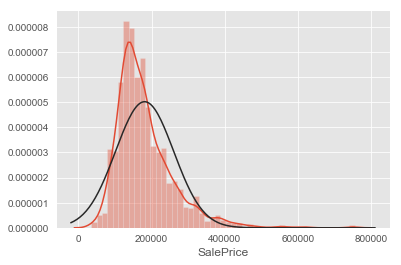

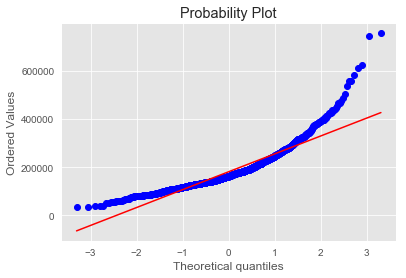

In [3]:
sns.distplot(data['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(data['SalePrice'],plot=plt)

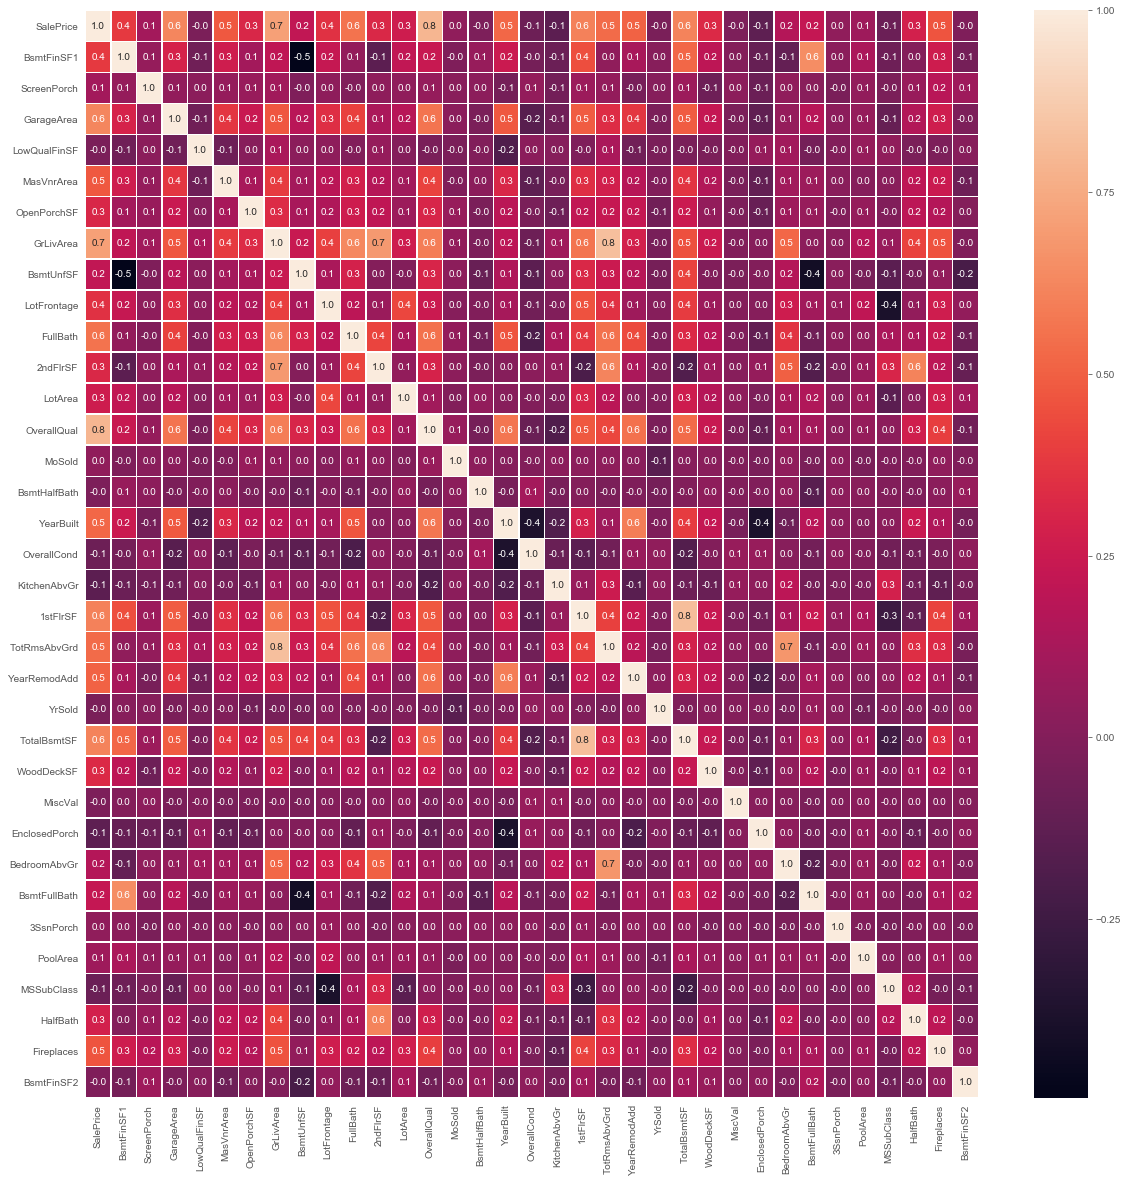

In [4]:
corrset=set(num_cols)-set(redun_num_cols)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[corrset].corr(),annot=True, fmt=".1f",linewidth='0.5',ax=ax)

In [5]:
th=0.4
impvars=data[corrset].corr()['SalePrice'].loc[(data[corrset].corr()['SalePrice'] > th) |
                                      (data[corrset].corr()['SalePrice'] < -1*th)].index.tolist()
print(impvars)

['SalePrice', 'GarageArea', 'MasVnrArea', 'GrLivArea', 'FullBath', 'OverallQual', 'YearBuilt', '1stFlrSF', 'TotRmsAbvGrd', 'YearRemodAdd', 'TotalBsmtSF', 'Fireplaces']


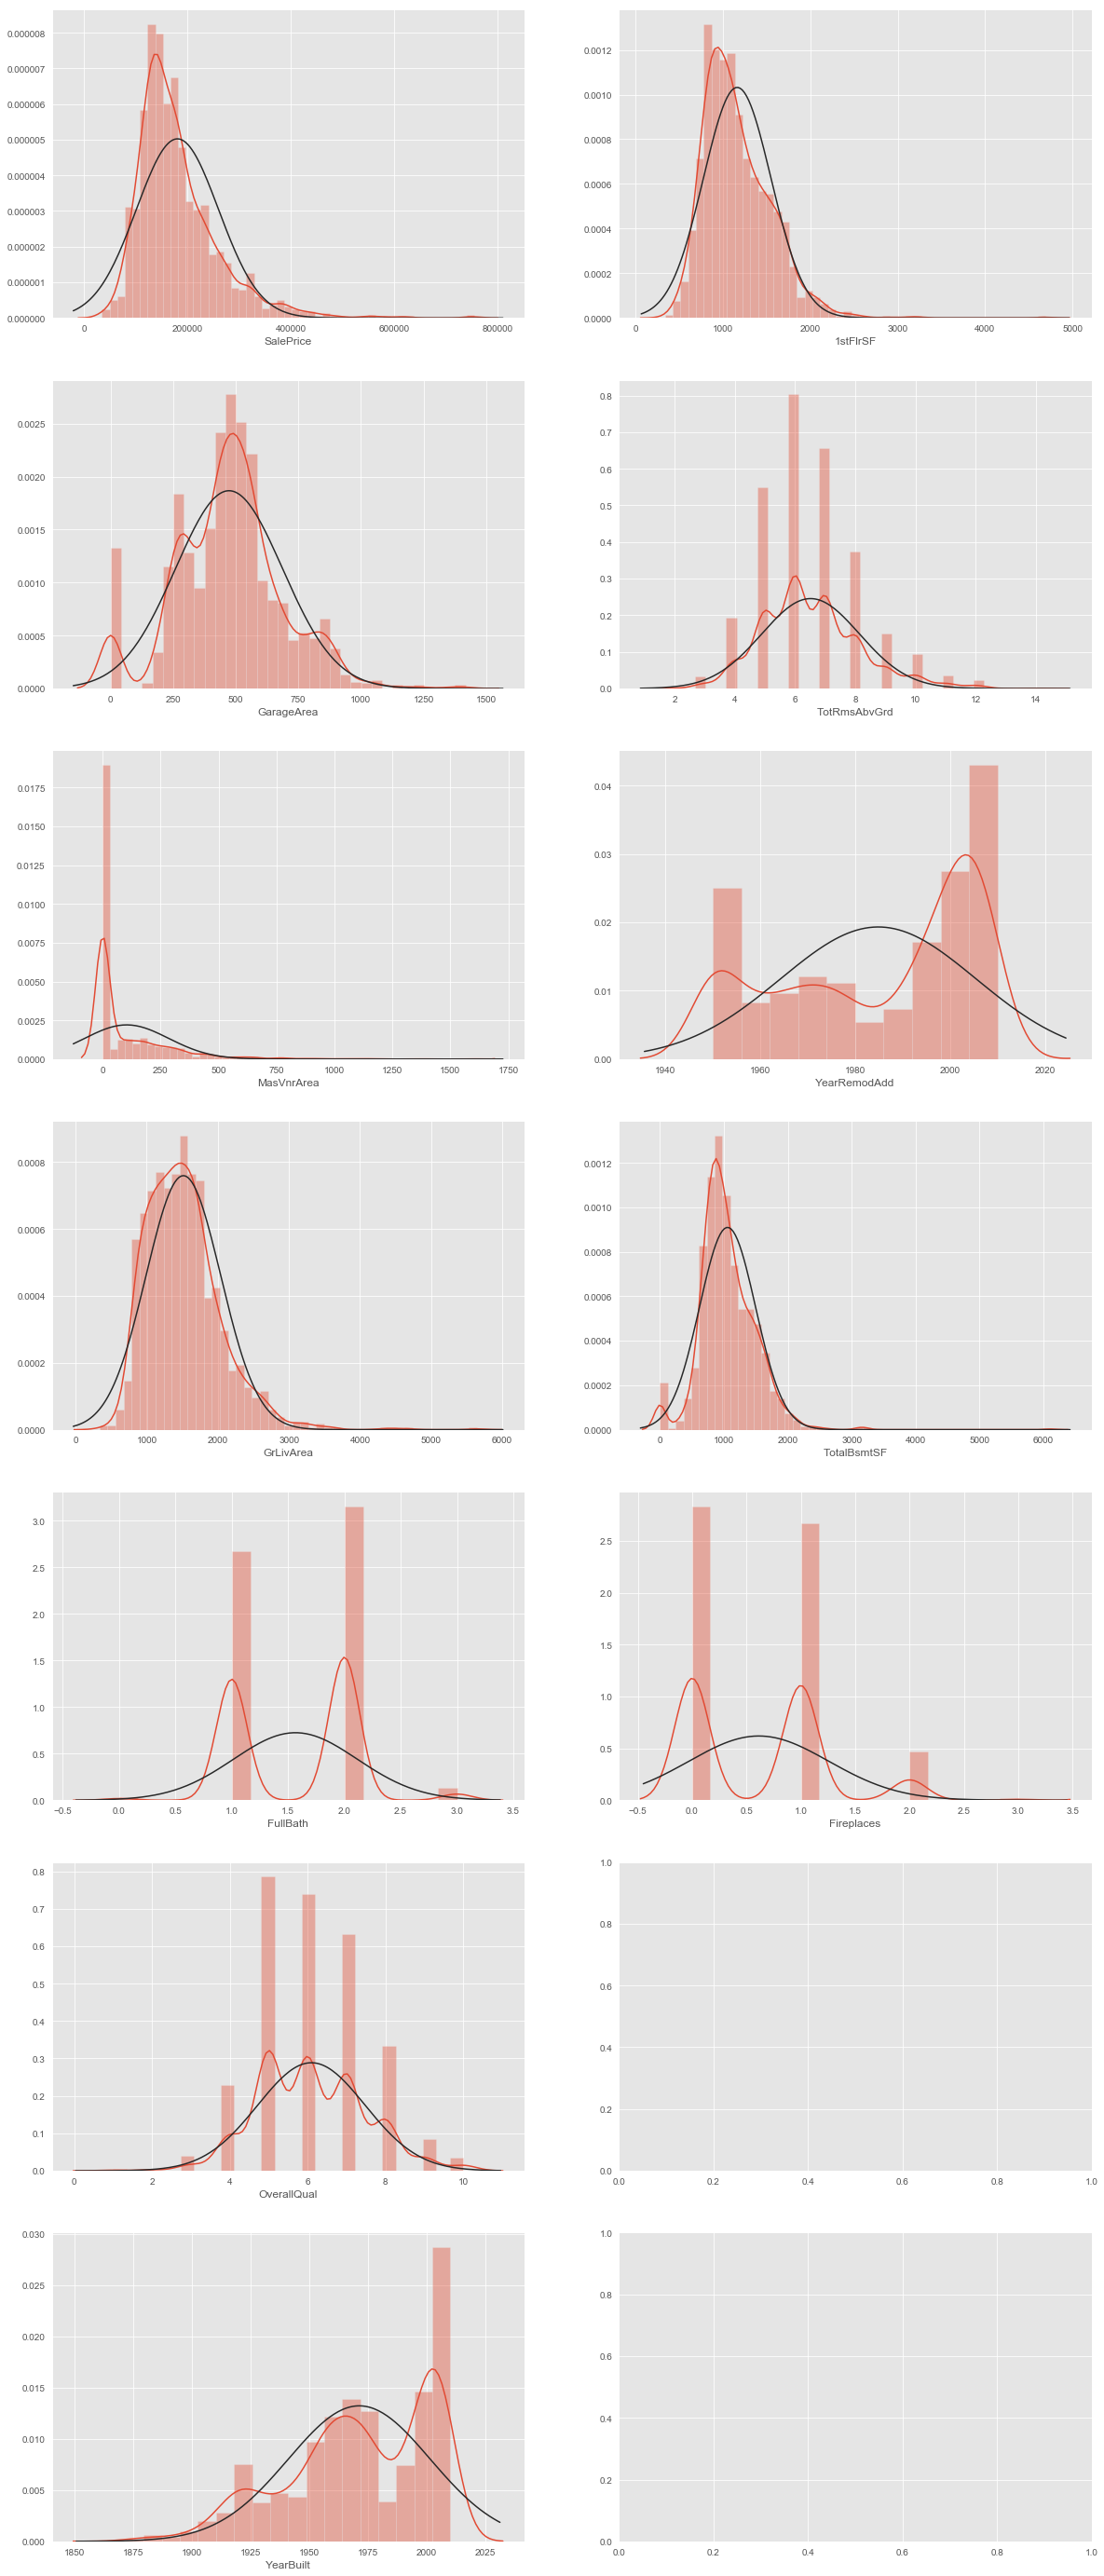

In [6]:
fig , axes = plt.subplots(figsize=(20,50), nrows=round(len(impvars)/2)+1, ncols=2)
i=0
j=0
for item in impvars:
    sns.distplot(data[item].dropna(),fit=norm, ax=axes[i,j])
    if i == round(len(impvars)/2):
        i=0
        j=1
    else:
        i=i+1

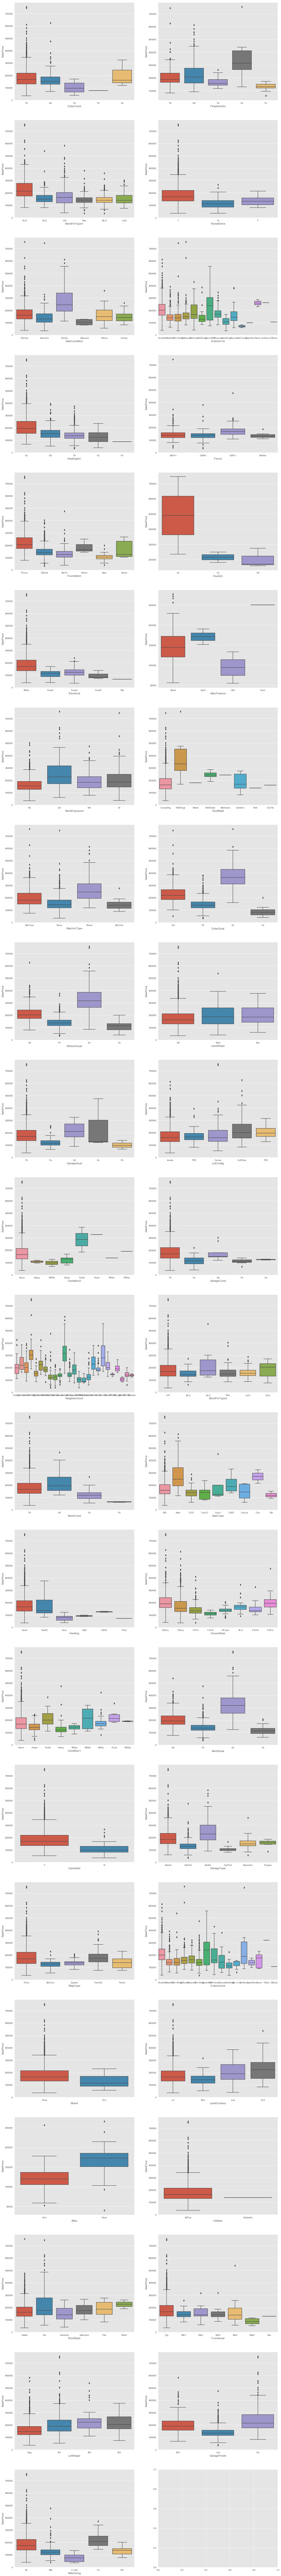

In [29]:
fig , axes = plt.subplots(figsize=(20,200), nrows=round(len(cat_cols)/2), ncols=2)
i=0
j=0
for item in cat_cols:
    sns.boxplot(x=data[item],y=data['SalePrice'], ax=axes[i,j])
    if i == round(len(cat_cols)/2) -1:
        i=0
        j=1
    else:
        i=i+1

In [30]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
    miss=pd.concat([total,percent], axis=1, keys=['total','percent'])
    return miss[miss['total']>0]
print(missing(data[impvars]))
print(missing(data[cat_cols]))

            total   percent
MasVnrArea      8  0.005479
              total   percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
GarageCond       81  0.055479
GarageQual       81  0.055479
GarageFinish     81  0.055479
GarageType       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685


['Fireplaces',
 '1stFlrSF',
 'GarageArea',
 'OverallQual',
 'TotalBsmtSF',
 'MasVnrArea',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GrLivArea',
 'SalePrice',
 'FullBath']

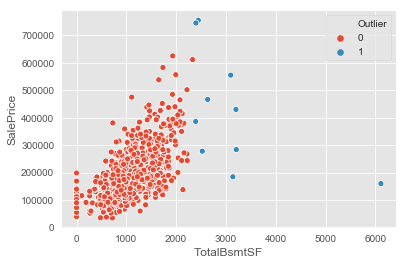

In [31]:
def scale(var):
    scale=(var-var.mean())/var.std()
    outlier=((scale > 3) | (scale < -3)).astype(int)
    return outlier
d1=data
d1['Outlier']=scale(data['TotalBsmtSF'])
sns.scatterplot(x='TotalBsmtSF',y='SalePrice', hue ='Outlier',data=d1)

['Fireplaces', '1stFlrSF', 'GarageArea', 'OverallQual', 'TotalBsmtSF', 'MasVnrArea', 'YearBuilt', 
 'YearRemodAdd', 'TotRmsAbvGrd', 'GrLivArea', 'SalePrice', 'FullBath']

In [32]:
#data transformation

data['MasVnrArea']=data['MasVnrArea'].fillna(0)
data['age']=np.log(2020- data['YearBuilt'] +1)
data['remodage']=np.log(2020- data['YearRemodAdd'] +1)

for item in impvars:
    data["ln" + item]=np.log(data[item]+1)
    
for item in cat_cols:
    dummies=pd.get_dummies(data[item], prefix=item)
    data=pd.concat([data,dummies],axis=1)

In [33]:
#data exclusions

#data=data.drop(data[data['SalePrice']> 400000].index)
#data=data.drop(data[data['GrLivArea']> 3200].index)
#data=data.drop(data[data['MasVnrArea']> 620].index)
#data=data.drop(data[data['1stFlrSF']> 3000].index)
#data=data.drop(data[data['TotalBsmtSF']> 3000].index)

In [34]:
exclu=['']
label=['lnSalePrice']
features=list(set(data.columns.tolist()) - set(num_cols) - set(cat_cols) - set(label))

In [35]:
missing(data[features])

,total,percent


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data[label], test_size = 0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 266)
(438, 266)
(1022, 1)
(438, 1)


In [46]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

model1=Lasso(alpha=0.002).fit(X_train,y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.8902385422263166
0.8959347819609454


In [47]:
model1.coef_

array([-8.97242184e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -7.47332023e-03,  6.48855748e-02,
        3.08292398e-03, -0.00000000e+00,  1.37772822e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -4.54071797e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.61627027e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.02280530e-02, -0.00000000e+00, -4.18320988e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.30743397e-02,
        5.56167259e-02,  0.00000000e+00, -0.00000000e+00, -1.98745681e-02,
       -0.00000000e+00,  4.18981086e-01, -2.29855472e-02,  0.00000000e+00,
       -0.00000000e+00, -

In [48]:
#y_true_train=np.exp(y_train)+1
#y_true_test=np.exp(y_test)+1
#train_pred=np.exp(model1.predict(X_train).flatten())+1
#test_pred=np.exp(model1.predict(X_test).flatten())+1

y_true_train=y_train
y_true_test=y_test
train_pred=model1.predict(X_train).flatten()
test_pred=model1.predict(X_test).flatten()

print("Train MAE: %f" % mean_absolute_error(y_true_train,train_pred))
print("Train MSE: %f" % mean_squared_error(y_true_train,train_pred))
print("Train RMSE: %f" % np.sqrt(mean_squared_error(y_true_train,train_pred)))
print("Train R2: %f" % r2_score(y_true_train,train_pred))

Train MAE: 0.092029
Train MSE: 0.018163
Train RMSE: 0.134769
Train R2: 0.890239


In [49]:
print("test MAE: %f" % mean_absolute_error(y_true_test,test_pred))
print("test MSE: %f" % mean_squared_error(y_true_test,test_pred))
print("test RMSE: %f" % np.sqrt(mean_squared_error(y_true_test,test_pred)))
print("test R2: %f" % r2_score(y_true_test,test_pred))

test MAE: 0.086753
test MSE: 0.015074
test RMSE: 0.122777
test R2: 0.895935


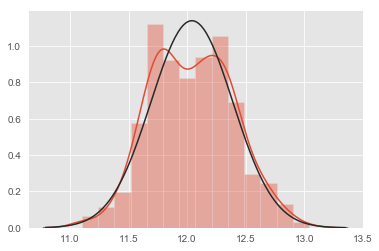

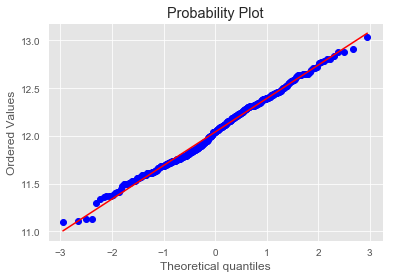

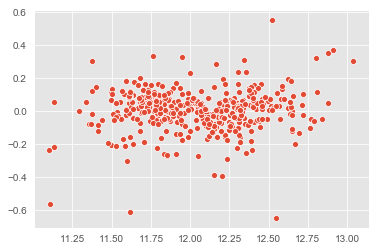

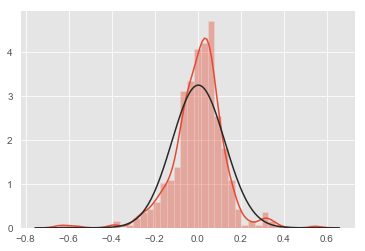

In [50]:
sns.distplot(test_pred, fit=norm)
fig=plt.figure()
res=stats.probplot(test_pred,plot=plt)
fig=plt.figure()
sns.scatterplot(x=np.array(test_pred).flatten(),y=(np.array(y_true_test).flatten()-test_pred))
fig=plt.figure()
sns.distplot((np.array(y_true_test).flatten()-test_pred), fit=norm)

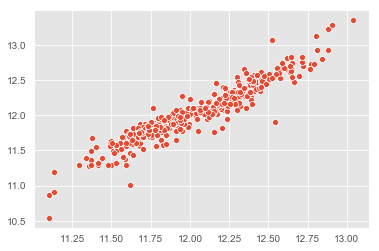

In [51]:
sns.scatterplot(x=test_pred, y=np.array(y_true_test).flatten())